Clarisa Hasya Yutika (1301174256)

Tugas Besar Machine Learning

Clustering (K-Means) & Classification (Naive Bayes & Decision Tree & K Nearest Neighbor)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['figure.dpi'] = 100

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('air_bnb.csv')

# PREPROCESSING

Data Exploration

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


In [4]:
#check missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22552 non-null  int64  
 1   name                            22493 non-null  object 
 2   host_id                         22552 non-null  int64  
 3   host_name                       22526 non-null  object 
 4   neighbourhood_group             22552 non-null  object 
 5   neighbourhood                   22552 non-null  object 
 6   latitude                        22552 non-null  float64
 7   longitude                       22552 non-null  float64
 8   room_type                       22552 non-null  object 
 9   price                           22552 non-null  int64  
 10  minimum_nights                  22552 non-null  int64  
 11  number_of_reviews               22552 non-null  int64  
 12  last_review                     

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.255200e+04,2.255200e+04,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,18638.000000,22552.000000,22552.000000
mean,1.571560e+07,5.403355e+07,52.509824,13.406107,67.143668,7.157059,17.840679,1.135525,1.918233,79.852829
std,8.552069e+06,5.816290e+07,0.030825,0.057964,220.266210,40.665073,36.769624,1.507082,3.667257,119.368162
min,2.015000e+03,2.217000e+03,52.345803,13.103557,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.065954e+06,9.240002e+06,52.489065,13.375411,30.000000,2.000000,1.000000,0.180000,1.000000,0.000000
50%,1.686638e+07,3.126711e+07,52.509079,13.416779,45.000000,2.000000,5.000000,0.540000,1.000000,4.000000
75%,2.258393e+07,8.067518e+07,52.532669,13.439259,70.000000,4.000000,16.000000,1.500000,1.000000,129.000000
max,2.986735e+07,2.245081e+08,52.651670,13.757642,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000


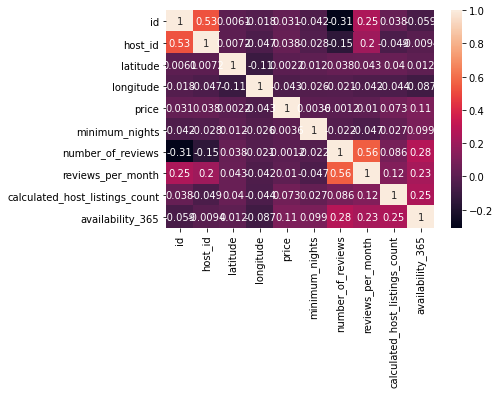

In [6]:
#check correlation
sns.heatmap(df.corr(), vmax=1, annot=True)

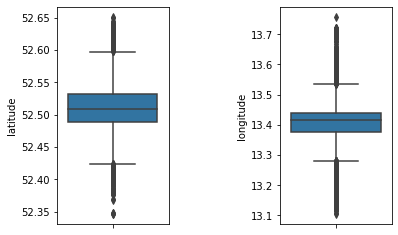

In [7]:
#check outlier
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df["latitude"], ax=axes[0])
sns.boxplot(y=df["longitude"], ax=axes[1])
plt.subplots_adjust(wspace=1)

Data Cleansing

In [8]:
#pick 2 attribute for clustering
cluster = df.loc[:,'latitude':'longitude'] #model 1
clusterr = df.loc[:,'latitude':'longitude'] #model2
cluster.head()
clusterr.head()

,latitude,longitude
0,52.534537,13.402557
1,52.548513,13.404553
2,52.534996,13.417579
3,52.498855,13.349065
4,52.543157,13.415091


In [9]:
#handle outlier 
#longitude
#for model 2 clustering

while True:
  qlo1, qlo3 = np.percentile(clusterr['longitude'],[25,75])
  iqrlo = qlo3 - qlo1
  lowerlo = qlo1 - (1.5 * iqrlo)
  upperlo = qlo3 + (1.5 * iqrlo)
  outlierlo = clusterr[(clusterr['longitude'] < (lowerlo)) | (clusterr['longitude'] > (upperlo))]
  print('amount of outlier data',outlierlo.shape[0]) #amount of outlier data
  idxlo = outlierlo.index
  # midlo = np.median(clusterr['longitude'])
  # clusterr.loc[idxlo,'longitude'] = midlo #impute with median
  clusterr.drop(idxlo, inplace=True) #drop outlier data
  if (outlierlo.shape[0] <= 0):
    break

clusterr['longitude'].describe()

amount of outlier data 718
amount of outlier data 113
amount of outlier data 43
amount of outlier data 11
amount of outlier data 2
amount of outlier data 2
amount of outlier data 0


count    21663.000000
mean        13.407514
std          0.046697
min         13.288906
25%         13.378843
50%         13.417312
75%         13.438818
max         13.528749
Name: longitude, dtype: float64

In [10]:
#handle outlier 
#latitude
#for model 2

while True:
  qla1, qla3 = np.percentile(clusterr['latitude'],[25,75])
  iqrla = qla3 - qla1
  lowerla = qla1 - (1.5 * iqrla)
  upperla = qla3 + (1.5 * iqrla)
  outlierla = clusterr[(clusterr['latitude'] < (lowerla)) | (clusterr['latitude'] > (upperla))]
  print('amount of outlier data',outlierla.shape[0] ) #amount of outlier data
  idxla = outlierla.index
  # midla = np.median(clusterr['latitude'])
  # clusterr.loc[idxla,'latitude'] = midla #impute with median
  clusterr.drop(idxla, inplace=True) #drop outlier data
  if (outlierla.shape[0] <= 0):
    break

clusterr['latitude'].describe()

amount of outlier data 168
amount of outlier data 4
amount of outlier data 0


count    21491.000000
mean        52.510848
std          0.027920
min         52.425599
25%         52.489835
50%         52.509355
75%         52.532795
max         52.596847
Name: latitude, dtype: float64

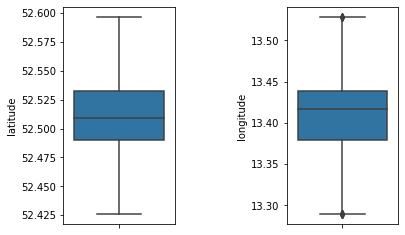

In [11]:
#check outlier after handle it
f, axes = plt.subplots(1, 2)
sns.boxplot(y=clusterr["latitude"], ax=axes[0])
sns.boxplot(y=clusterr["longitude"], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [12]:
#pick 4 attribute for classification
clas = df.loc[:,'neighbourhood_group':'longitude']
clas.head()

,neighbourhood_group,neighbourhood,latitude,longitude
0,Mitte,Brunnenstr. Süd,52.534537,13.402557
1,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553
2,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579
3,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065
4,Pankow,Helmholtzplatz,52.543157,13.415091


In [13]:
#encode from ordinal type to numerical type
from sklearn import preprocessing

encode = preprocessing.LabelEncoder()
clas['neighbourhood_group'] = encode.fit_transform(clas['neighbourhood_group'])
clas['neighbourhood'] = encode.fit_transform(clas['neighbourhood'])

clas.head()

,neighbourhood_group,neighbourhood,latitude,longitude
0,4,18,52.534537,13.402557
1,6,95,52.548513,13.404553
2,6,98,52.534996,13.417579
3,10,110,52.498855,13.349065
4,6,49,52.543157,13.415091


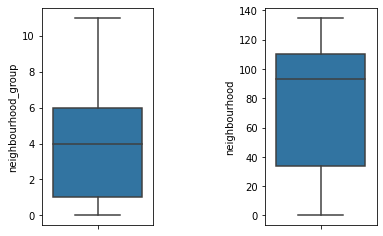

In [14]:
#check outlier after encode
f, axes = plt.subplots(1, 2)
sns.boxplot(y=clas['neighbourhood_group'], ax=axes[0])
sns.boxplot(y=clas['neighbourhood'], ax=axes[1])
plt.subplots_adjust(wspace=1)

Feature Engineering (Scalling)

In [0]:

# cluster['latitude'] = cluster['latitude'].apply(lambda x: (x - cluster['latitude'].min()) / (cluster['latitude'].max() - cluster['latitude'].min()))
# cluster['longitude'] = cluster['longitude'].apply(lambda x: (x - cluster['longitude'].min()) / (cluster['longitude'].max() - cluster['longitude'].min()))

#min max normalization

from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
cluster = minmax.fit_transform(cluster)
cluster = pd.DataFrame(cluster, columns=['latitude','longitude']) 
cluster.head()

clusterr = minmax.fit_transform(clusterr)
clusterr = pd.DataFrame(clusterr, columns=['latitude','longitude']) 

# clas = minmax.fit_transform(clas)
# clas = pd.DataFrame(clas, columns=['neighbourhood_group','neighbourhood','latitude','longitude']) 
# clas.head()

In [0]:
#z score normalization
# from scipy import stats

# clusterr = stats.zscore(clusterr)

# clusterr = pd.DataFrame(clusterr, columns=['latitude','longitude']) 
# clusterr.head()

# CLUSTERING

Model 1. Use K=4 & MinMaxNormalization & Not Handle Outlier

In [0]:
#Search the best K using elbow method
from sklearn.cluster import KMeans #only used for elbow method
from scipy.spatial.distance import cdist

K = range(1,10)
distortions = []
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k).fit(cluster)
    kmeanModel.fit(cluster)
    distortions.append(sum(np.min(cdist(cluster, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / cluster.shape[0])

<function matplotlib.pyplot.show>

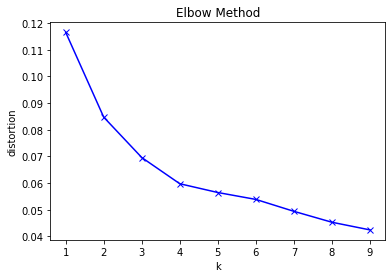

<Figure size 360x360 with 0 Axes>

In [18]:
#plot elbow method
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('distortion')
plt.title('Elbow Method')
fig = plt.figure(figsize=(5, 5))
plt.show

In [19]:
#evaluation based on SSE

print('k=4',distortions[3])
print('k=5',distortions[4])

k=4 0.0597194541915578
k=5 0.05643011892853079


In [0]:
# Find Centroids

import random

def find_centroids(cluster):
    k = 4   #from elbow method, the best k is 4
    centroids = {
        i + 1 : [random.choices(cluster['latitude']),random.choices(cluster['longitude'])]
        for i in range(k)
    }
    return centroids


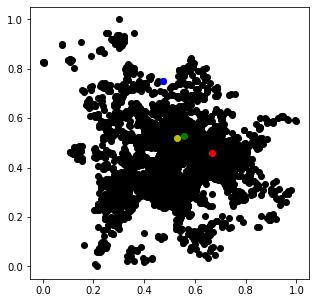

In [21]:
# Plot Centroids

centroids = find_centroids(cluster)
fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster['latitude'], cluster['longitude'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

In [22]:
## Assignment Stage


def assignment(cluster, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2) euclidean distance
        cluster['distance_from_{}'.format(i)] = (
            np.sqrt(
                (cluster['latitude'] - centroids[i][0]) ** 2
                + (cluster['longitude'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    cluster['closest'] = cluster.loc[:, centroid_distance_cols].idxmin(axis=1)
    cluster['closest'] = cluster['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    cluster['color'] = cluster['closest'].map(lambda x: colmap[x])
    return cluster

cluster = assignment(cluster, centroids)
cluster.head()

,latitude,longitude,distance_from_1,distance_from_2,distance_from_3,distance_from_4,closest,color
0,0.617046,0.457127,0.048728,0.092723,0.328628,0.109425,1,r
1,0.662737,0.460179,0.003981,0.126223,0.348603,0.147797,1,r
2,0.618546,0.480093,0.052308,0.078378,0.308885,0.099326,1,r
3,0.500386,0.375345,0.184712,0.160421,0.377844,0.147605,4,y
4,0.645228,0.476290,0.027772,0.102978,0.325595,0.125472,1,r


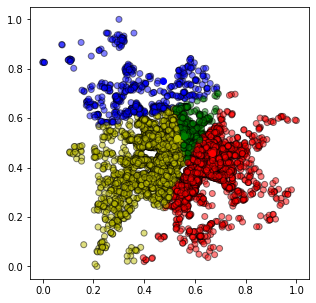

In [23]:
#plot assignment stage

fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster['latitude'], cluster['longitude'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.xlim(-1.5, 1.5)
# plt.ylim(-1.5, 1.5)
plt.show()

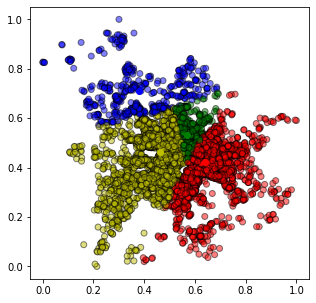

In [24]:
# Update Centroids


def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(cluster[cluster['closest'] == i]['latitude'])
        centroids[i][1] = np.mean(cluster[cluster['closest'] == i]['longitude'])
    return k

centroids = update(centroids)

# Plot results

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(cluster['latitude'], cluster['longitude'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.xlim(-1.5, 1.5)
# plt.ylim(-1.5, 1.5)
# plt.xlim(52.3, 52.7)
# plt.ylim(13.0, 14.0)
plt.show()

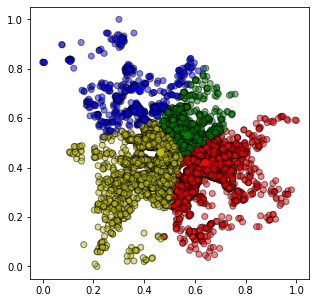

In [25]:
## Repeat Assigment Stage

cluster = assignment(cluster, centroids)

# Plot results

fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster['latitude'], cluster['longitude'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

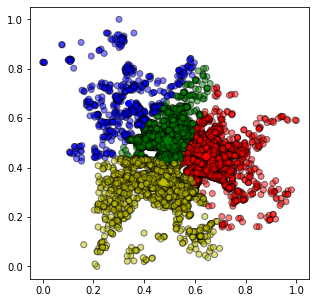

In [26]:
# Continue until all assigned categories don't change any more

while True:
    closest_centroids = cluster['closest'].copy(deep=True)
    centroids = update(centroids)
    cluster = assignment(cluster, centroids)
    if closest_centroids.equals(cluster['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster['latitude'], cluster['longitude'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

Model 2. K=4 & MinMaxNormalization & Handling the Outlier by Drop the Data

In [0]:
#evaluation using elbow method
from sklearn.cluster import KMeans #only used for elbow method
from scipy.spatial.distance import cdist

K = range(1,10)
distortionss = []
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k).fit(clusterr)
    kmeanModel.fit(clusterr)
    distortionss.append(sum(np.min(cdist(clusterr, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / clusterr.shape[0])

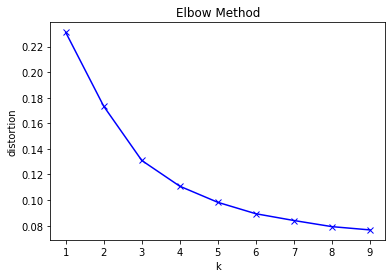

<Figure size 360x360 with 0 Axes>

In [28]:
#plot elbow method
plt.plot(K, distortionss, 'bx-')
plt.xlabel('k')
plt.ylabel('distortion')
plt.title('Elbow Method')
fig = plt.figure(figsize=(5, 5))
plt.show()

In [29]:
print('k=4',distortionss[3])
print('k=5',distortionss[4])

k=4 0.11082693261761033
k=5 0.09823912423063569


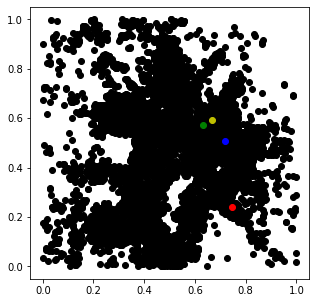

In [30]:
# Plot Centroids

centroidss = find_centroids(clusterr)
fig = plt.figure(figsize=(5, 5))
plt.scatter(clusterr['latitude'], clusterr['longitude'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}
for i in centroids.keys():
    plt.scatter(*centroidss[i], color=colmap[i])
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.xlim(-1.5, 1.5)
# plt.ylim(-1.5, 1.5)
plt.show()

In [31]:
## Assignment Stage

clusterr = assignment(clusterr, centroidss)
clusterr.head()

,latitude,longitude,distance_from_1,distance_from_2,distance_from_3,distance_from_4,closest,color
0,0.636142,0.474181,0.256485,0.098901,0.087680,0.120813,3,b
1,0.717752,0.482508,0.241723,0.125096,0.023729,0.120183,3,b
2,0.638822,0.536855,0.313334,0.036876,0.084661,0.060884,2,g
3,0.427776,0.250997,0.318416,0.380924,0.386308,0.415490,1,r
4,0.686478,0.526477,0.290212,0.072119,0.037252,0.067730,3,b


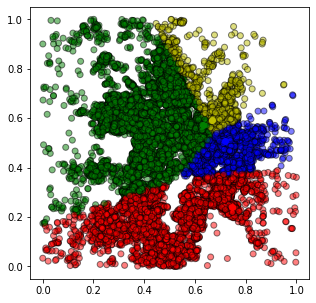

In [32]:
#plot assignment stage

fig = plt.figure(figsize=(5, 5))
plt.scatter(clusterr['latitude'], clusterr['longitude'], color=clusterr['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroidss[i], color=colmap[i])
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.xlim(-1.5, 1.5)
# plt.ylim(-1.5, 1.5)
plt.show()

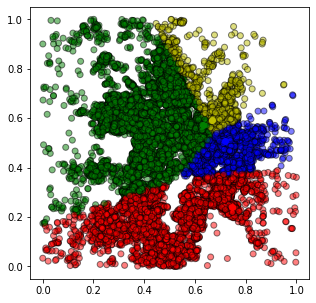

In [33]:
# Update Centroids

centroidss = update(centroidss)

# Plot results

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(clusterr['latitude'], clusterr['longitude'], color=clusterr['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroidss[i], color=colmap[i])
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.xlim(-1.5, 1.5)
# plt.ylim(-1.5, 1.5)
# plt.xlim(52.3, 52.7)
# plt.ylim(13.0, 14.0)
plt.show()

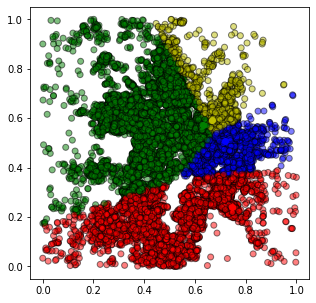

In [34]:
## Repeat Assigment Stage

clusterr = assignment(clusterr, centroidss)

# Plot results

fig = plt.figure(figsize=(5, 5))
plt.scatter(clusterr['latitude'], clusterr['longitude'], color=clusterr['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroidss[i], color=colmap[i])
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.xlim(-1.5, 1.5)
# plt.ylim(-1.5, 1.5)
# plt.xlim(52.3, 52.7)
# plt.ylim(13.0, 14.0)

plt.show()

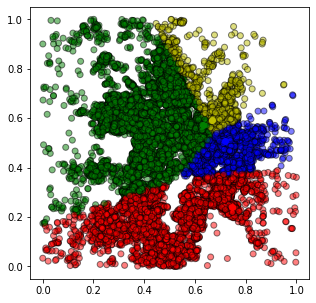

In [35]:
# Continue until all assigned categories don't change any more

while True:
    closest_centroids = clusterr['closest'].copy(deep=True)
    centroidss = update(centroidss)
    clusterr = assignment(clusterr, centroidss)
    if closest_centroids.equals(clusterr['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(clusterr['latitude'], clusterr['longitude'], color=clusterr['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroidss[i], color=colmap[i])
plt.show()

# CLASSIFICATION

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tr
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as pr
from sklearn.metrics import recall_score as rec

In [0]:
#variable selection, splitting into features and class
features = clas.drop(["neighbourhood_group"], axis = 1)
claas = clas["neighbourhood_group"]

In [38]:
features.head()

,neighbourhood,latitude,longitude
0,18,52.534537,13.402557
1,95,52.548513,13.404553
2,98,52.534996,13.417579
3,110,52.498855,13.349065
4,49,52.543157,13.415091


In [39]:
claas.head()

0     4
1     6
2     6
3    10
4     6
Name: neighbourhood_group, dtype: int64

In [0]:
#splitting into training and testing
f_train, f_test, c_train, c_test = tr(features, claas, test_size=0.2, random_state=1) # 80% data train, 20% data test

In [41]:
f_train.head()

,neighbourhood,latitude,longitude
13916,73,52.535735,13.357130
14076,135,52.499286,13.445806
9956,35,52.499444,13.510699
9612,100,52.511179,13.383790
16401,91,52.561302,13.399581


In [42]:
f_test.head()

,neighbourhood,latitude,longitude
16455,51,52.508308,13.312476
21435,110,52.492695,13.360330
8155,87,52.573421,13.356127
9009,135,52.493702,13.431392
10801,115,52.503983,13.414387


In [43]:
c_train.head()

13916    4
14076    1
9956     2
9612     4
16401    6
Name: neighbourhood_group, dtype: int64

In [44]:
c_test.head()

16455     0
21435    10
8155      7
9009      1
10801     1
Name: neighbourhood_group, dtype: int64

Model 1. Naive Bayes

In [45]:
#Create a Gaussian Classifier
naive = GaussianNB()

# Train the model using the training sets
naive.fit(f_train, c_train)

#Predict Output
cn_predict = naive.predict(f_test)
print("Class Prediction\n")
for i in range(len(cn_predict)):
    print(cn_predict[i])

Class Prediction

0
10
7
1
1
1
6
1
1
1
5
1
6
5
4
6
5
0
1
4
10
1
10
1
4
6
4
10
4
1
5
0
1
10
0
1
1
0
1
6
5
5
5
0
3
1
1
2
6
1
5
10
1
6
4
0
4
1
5
4
5
6
10
1
1
5
4
4
6
10
5
5
4
1
1
6
6
10
0
4
5
1
5
5
4
6
5
10
5
9
6
10
1
4
4
4
1
4
9
5
4
1
4
3
1
1
5
1
1
4
10
1
5
1
4
1
4
1
4
1
1
10
4
5
10
2
4
4
5
0
11
9
10
10
5
0
5
10
6
4
5
0
6
6
2
4
6
1
5
0
4
5
5
0
6
6
5
5
10
1
1
5
5
5
5
1
1
1
1
6
1
4
10
1
1
1
6
6
10
4
5
1
4
2
10
1
6
4
5
0
4
0
1
1
1
1
1
5
1
3
1
10
9
1
4
9
7
5
4
4
10
6
5
4
1
0
1
5
5
6
6
6
6
5
1
4
5
0
5
5
1
0
1
1
4
10
1
10
1
5
5
5
5
4
5
5
5
9
7
5
0
11
5
10
6
10
5
0
1
4
4
0
1
11
5
1
6
4
1
1
10
9
6
9
1
5
4
9
0
4
4
7
1
1
4
1
4
4
4
5
4
4
10
6
7
2
6
4
6
1
1
5
6
1
5
5
4
7
10
6
1
10
1
1
1
5
1
4
4
1
6
10
2
1
0
6
1
1
10
1
1
6
6
4
5
6
1
1
6
1
1
0
4
0
1
9
5
5
10
4
4
5
4
1
6
6
6
4
1
5
1
6
4
1
1
1
10
1
0
10
9
4
4
1
1
5
1
1
10
0
10
4
4
5
0
1
1
1
1
4
6
5
2
1
6
4
0
6
4
1
1
11
1
4
2
1
4
6
4
4
0
4
5
6
9
5
0
1
7
6
11
1
4
4
6
6
1
1
5
4
10
1
4
4
5
6
9
11
5
7
5
1
1
6
5
10
1
1
2
1
1
10
10
5
4
1
10
5
4
1
5
1
5
6
1
2
1

In [46]:
# Accuracy score
print("NAIVE BAYES\n")

print("F1-SCORE ",f1(c_test,cn_predict,average='macro'))

print("ACCURACY ",acc(c_test,cn_predict))

print("PRECISION ",pr(c_test,cn_predict,average='macro'))

print("RECALL",rec(c_test,cn_predict,average='macro'))

NAIVE BAYES

F1-SCORE  0.8436087528171469
ACCURACY  0.8940367989359344
PRECISION  0.8753170302119303
RECALL 0.8253868233628489


Model 2. Decision Tree

In [47]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
dt = dt.fit(f_train,c_train)

#Predict the response for test dataset
cd_predict = dt.predict(f_test)
print("Class Prediction\n")
for i in range(len(cd_predict)):
    print(cd_predict[i])

Class Prediction

0
10
7
1
1
1
6
1
1
1
5
1
6
5
4
4
5
4
1
4
10
1
1
1
1
6
4
1
4
1
5
0
1
10
0
1
1
0
1
6
5
5
1
0
2
1
2
2
6
1
5
5
1
6
4
0
4
1
1
4
5
6
10
1
1
5
4
1
6
4
5
5
4
1
1
6
6
10
0
4
5
1
1
5
0
6
1
10
5
9
6
1
1
4
4
4
2
4
9
5
4
1
4
2
1
5
5
1
1
4
0
1
5
1
4
1
4
1
4
1
1
1
4
5
9
2
4
4
5
0
11
10
10
10
5
0
5
10
6
4
5
0
6
6
2
4
6
1
5
0
4
1
1
0
6
6
1
5
1
1
1
1
5
5
5
1
1
1
1
4
1
1
10
1
1
1
6
6
1
4
5
1
4
2
10
1
6
0
5
0
4
0
1
1
1
1
1
5
1
3
1
10
9
1
4
9
7
5
4
1
5
6
5
4
1
0
1
5
5
6
4
6
6
5
1
4
5
8
5
1
1
0
1
1
1
1
1
10
2
5
5
5
5
4
5
5
5
10
7
5
0
11
5
10
6
10
5
0
1
4
4
0
1
11
5
2
6
0
1
1
1
10
4
10
1
5
4
10
0
1
4
7
1
1
4
2
4
4
4
5
4
4
0
4
6
2
6
4
6
1
1
1
4
1
5
1
4
7
0
4
1
0
1
1
1
5
1
4
4
1
6
5
2
1
0
6
1
1
1
1
1
6
6
4
5
6
1
1
6
1
1
0
4
0
2
9
1
5
10
4
4
5
4
2
4
4
6
4
1
5
1
6
1
1
1
1
10
1
0
10
9
4
1
1
1
5
1
1
4
4
10
4
4
5
0
1
1
1
1
4
6
5
2
1
6
4
0
6
0
1
1
11
1
4
2
1
4
6
4
4
0
4
5
6
9
5
0
1
6
6
11
1
4
0
6
6
1
1
5
4
10
1
4
1
1
6
9
11
1
7
5
1
1
6
5
4
1
1
2
1
1
4
10
5
4
1
10
5
4
1
5
1
5
6
1
2
1
5
6
5
1
6
2
1
4

In [48]:
# Accuracy score
print("DECISION TREE\n")

print("F1-SCORE ",f1(c_test,cd_predict,average='macro'))

print("ACCURACY ",acc(c_test,cd_predict))

print("PRECISION ",pr(c_test,cd_predict,average='macro'))

print("RECALL",rec(c_test,cd_predict,average='macro'))

DECISION TREE

F1-SCORE  0.784082517135457
ACCURACY  0.8618931500775882
PRECISION  0.8449413312062246
RECALL 0.7627049805707324


Model 3. k Nearest Neighbor

In [49]:
#Create a KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
knn.fit(f_train,c_train)

#Predict Output
ck_predict = knn.predict(f_test)
print("Class Prediction\n")
for i in range(len(ck_predict)):
    print(ck_predict[i])

Class Prediction

0
10
7
1
1
1
6
4
1
1
5
1
6
5
4
4
5
4
1
4
10
1
1
1
4
6
4
1
4
1
5
0
1
10
0
1
1
0
1
6
5
5
5
0
3
1
2
2
6
1
5
10
1
6
4
0
4
1
1
4
5
6
10
1
1
5
4
4
6
4
5
5
4
4
1
6
6
10
0
4
5
1
5
5
4
6
5
10
5
9
6
1
1
4
4
4
2
4
9
5
4
4
4
3
1
1
5
1
1
4
0
1
5
1
4
1
4
1
4
1
1
1
4
5
9
2
4
4
5
0
2
9
10
10
5
0
5
10
6
4
5
0
6
6
2
4
6
1
5
0
4
5
5
0
6
6
5
5
1
1
1
5
5
5
5
1
1
1
1
6
1
4
10
1
1
1
6
6
4
4
5
1
4
2
10
1
6
4
5
0
4
0
1
1
1
1
1
10
5
3
1
10
9
1
4
9
7
5
4
4
10
6
5
4
1
0
1
5
5
6
4
6
6
5
1
4
5
0
5
5
1
0
4
1
4
1
1
10
2
5
5
5
5
4
5
5
5
9
7
5
0
11
5
10
6
10
5
0
11
4
4
0
1
2
5
2
6
4
1
1
1
9
6
9
11
5
4
9
10
4
4
7
11
1
4
2
4
4
4
5
4
4
10
4
6
2
6
4
6
1
1
11
6
1
5
1
4
7
0
6
1
0
11
1
1
5
1
4
4
1
6
10
2
1
10
6
1
1
1
1
1
6
6
4
5
6
1
1
6
1
1
0
4
0
2
9
5
1
10
4
4
5
4
2
4
6
6
4
1
5
1
6
4
1
1
5
10
1
0
10
9
4
4
1
1
5
1
1
4
4
10
4
4
5
0
11
1
1
1
4
6
5
2
1
6
4
0
6
4
1
1
11
1
4
2
1
4
6
4
4
0
4
5
6
9
5
0
1
6
6
11
1
4
4
6
6
1
1
5
4
10
4
4
4
5
6
9
11
1
7
5
1
1
6
5
4
1
1
2
1
1
10
10
5
4
1
10
5
4
1
5
1
5
6
1
3
1
5
6
10
1

In [50]:
# Accuracy score
print("K NEAREST NEIGHBOR\n")

print("F1-SCORE ",f1(c_test,ck_predict,average='macro'))

print("ACCURACY ",acc(c_test,ck_predict))

print("PRECISION ",pr(c_test,ck_predict,average='macro'))

print("RECALL",rec(c_test,ck_predict,average='macro'))

K NEAREST NEIGHBOR

F1-SCORE  0.9991527808363307
ACCURACY  0.9995566393260917
PRECISION  0.9997678737233056
RECALL 0.9985507246376811
